# Data Wrangling with Penguins

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

### Load messy penguin data set
- One .csv file for each species
- Check shape of data frames

In [4]:
Adelie_df = pd.read_csv('penguins_adelie.csv')
Adelie_df.shape

(152, 16)

In [5]:
Chinstrap_df = pd.read_csv('penguins_chinstrap.csv')
Chinstrap_df.shape

(68, 16)

In [6]:
Gentoo_df = pd.read_csv('penguins_gentoo.csv')
Gentoo_df.shape

(124, 16)

The researchers forgot to add the sex of the penguins in the same data set. Load the penguin_sex.csv file as well. Luckily they logged the same individual names. Unluckily the indinivual IDs are not unique!

In [7]:
all_penguins_sex = pd.read_csv('penguins_sex.csv')

## Create one data frame from the 4 above

### 1. Put different species in one Data Frame
- df.append()
- pd.concat()

In [283]:
Adelie_df.append([Chinstrap_df, Gentoo_df])

In [11]:
all_penguins = pd.concat([Adelie_df, Chinstrap_df, Gentoo_df])

#### Create a new real unique ID!
Take the first letter of the Species columns and the number of the column

In [54]:
penguin_number = np.arange(len(all_penguins['Species']))
all_penguins['Real ID'] = all_penguins['Species'].astype(str).str[0].astype('category')
all_penguins['Real ID'] = all_penguins['Real ID'].str.cat(pd.Series(penguin_number).astype(str), sep = "_")

In [55]:
all_penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Real ID
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,NaN,NaN,Not enough blood for isotopes.,A_0
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,8.94956,-24.69454,NaN,A_1
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,8.36821,-25.33302,NaN,A_2
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.,A_3
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,8.76651,-25.32426,NaN,A_4


#### Fix the index to be a simple row number

In [59]:
index = pd.Index(range(344))
all_penguins = all_penguins.set_index(index)

In [60]:
all_penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Real ID
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,NaN,NaN,Not enough blood for isotopes.,A_0
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,8.94956,-24.69454,NaN,A_1
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,8.36821,-25.33302,NaN,A_2
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.,A_3
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,8.76651,-25.32426,NaN,A_4


### 2. Add the penguins sex to the rest of the data
- pd.merge()

#### Load penguin_sex.csv

In [41]:
all_penguins_sex = pd.read_csv('penguins_sex.csv')
all_penguins_sex.index #the index is the same as in the all_penguins data frame

RangeIndex(start=0, stop=344, step=1)

In [214]:
all_penguins_sex.shape

(344, 2)

#### Add the 'Real ID', drop the 'Individual ID; column

In [62]:
all_penguins_sex['Real ID'] = all_penguins['Real ID']

In [68]:
all_penguins_sex = all_penguins_sex.drop(['Individual ID'], axis = 1)

### Join both data frames by Individual ID

In [108]:
df = pd.merge(all_penguins,all_penguins_sex, on = ['Real ID'], how = 'inner')

In [111]:
df.shape

(344, 18)

# Missing values

### Visualize empty values first, eg. with a seaborn heatmap
There is also a separate package misigno https://github.com/ResidentMario/missingno

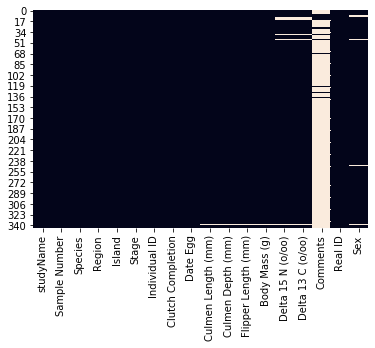

In [112]:
sns.heatmap(df.isnull(),cbar=False)

In [113]:
 df['Comments'].isna()

0      False
1       True
2       True
3      False
4       True
       ...  
339     True
340     True
341     True
342     True
343     True
Name: Comments, Length: 344, dtype: bool

### Remove all columns that contain 11 missing values or more

In [115]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
Real ID                  0
Sex                     10
dtype: int64

In [116]:
df.drop(['Delta 15 N (o/oo)','Delta 13 C (o/oo)', 'Comments'], axis = 1)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,A_3,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,G_339,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,G_340,FEMALE
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,G_341,MALE
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,G_342,FEMALE


In [118]:
df = df.dropna(axis = 1, thresh= 333)

## Let's explore the data answering following questions

### Which species do we have?
- df.unique()

In [119]:
df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

### Which Islands?

In [120]:
df['Island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

### Change species names to more simpler ones
- df.replace()
- 'Adelie Penguin (Pygoscelis adeliae)' to 'Adelie'
- 'Chinstrap penguin (Pygoscelis antarctica)' to 'Chinstrap'
- 'Gentoo penguin (Pygoscelis papua)', dtype=object)

In [121]:
df = df.replace('Adelie Penguin (Pygoscelis adeliae)', value = 'Adelie')
df = df.replace('Chinstrap penguin (Pygoscelis antarctica)', value = 'Chinstrap')
df = df.replace('Gentoo penguin (Pygoscelis papua)', value = 'Gentoo')

In [122]:
df['Species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### Save as .csv for further use

In [137]:
df.to_csv("all_penguins_clean.csv", index = False)

### Print out the biggest and smallest penguins
- Series.max()
- Series.min()
- df.describe()

In [123]:
df['Body Mass (g)'].loc[df['Species'] == 'Adelie'].max()

4775.0

In [124]:
df['Body Mass (g)'].min()

2700.0

In [125]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,344.000000,342.000000,342.000000,342.000000,342.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386
std,40.430199,5.459584,1.974793,14.061714,801.954536
min,1.000000,32.100000,13.100000,172.000000,2700.000000
25%,29.000000,39.225000,15.600000,190.000000,3550.000000
50%,58.000000,44.450000,17.300000,197.000000,4050.000000
75%,95.250000,48.500000,18.700000,213.000000,4750.000000
max,152.000000,59.600000,21.500000,231.000000,6300.000000


### How many penguins of each species do we have?
- Series.count()

In [130]:
df['Species'].loc[df['Species'] == 'Adelie'].count()

152

In [131]:
df['Species'].loc[df['Species'] == 'Gentoo'].count()

124

In [132]:
df['Species'].loc[df['Species'] == 'Chinstrap'].count()

68

***

## Aggregation .with groupby

### What's the average weight for the different species?
- Series.mean()

In [99]:
df['Body Mass (g)'].loc[df['Species'] == 'Adelie'].mean()

3700.662251655629

### Do the statistics differ by Species, by Sex, by Island?

In [133]:
df.groupby(['Species', 'Sex']).mean()

Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
Species   Sex                                                            
Adelie    FEMALE      78.315068           37.257534          17.621918   
          MALE        79.684932           40.390411          19.072603   
Chinstrap FEMALE      34.294118           46.573529          17.588235   
          MALE        34.705882           51.094118          19.252941   
Gentoo    .          117.000000           44.500000          15.700000   
          FEMALE      60.931034           45.563793          14.237931   
          MALE        61.967213           49.473770          15.718033   

                  Flipper Length (mm)  Body Mass (g)  
Species   Sex                                         
Adelie    FEMALE           187.794521    3368.835616  
          MALE             192.410959    4043.493151  
Chinstrap FEMALE           191.735294    3527.205882  
          MALE             199.911765    3938.970588  
Gentoo    .                217.000000    4875.000000  
          FEMALE           212.706897    4679.741379  
          MALE             221.540984    5484.836066

In [134]:
df.groupby(['Species', 'Sex', 'Island']).mean()

Sample Number  Culmen Length (mm)  \
Species   Sex    Island                                         
Adelie    FEMALE Biscoe         69.181818           37.359091   
                 Dream          93.074074           36.911111   
                 Torgersen      70.083333           37.554167   
          MALE   Biscoe         70.000000           40.590909   
                 Dream          92.107143           40.071429   
                 Torgersen      73.826087           40.586957   
Chinstrap FEMALE Dream          34.294118           46.573529   
          MALE   Dream          34.705882           51.094118   
Gentoo    .      Biscoe        117.000000           44.500000   
          FEMALE Biscoe         60.931034           45.563793   
          MALE   Biscoe         61.967213           49.473770   

                            Culmen Depth (mm)  Flipper Length (mm)  \
Species   Sex    Island                                              
Adelie    FEMALE Biscoe             17.704545           187.181818   
                 Dream              17.618519           187.851852   
                 Torgersen          17.550000           188.291667   
          MALE   Biscoe             19.036364           190.409091   
                 Dream              18.839286           191.928571   
                 Torgersen          19.391304           194.913043   
Chinstrap FEMALE Dream              17.588235           191.735294   
          MALE   Dream              19.252941           199.911765   
Gentoo    .      Biscoe             15.700000           217.000000   
          FEMALE Biscoe             14.237931           212.706897   
          MALE   Biscoe             15.718033           221.540984   

                            Body Mass (g)  
Species   Sex    Island                    
Adelie    FEMALE Biscoe       3369.318182  
                 Dream        3344.444444  
                 Torgersen    3395.833333  
          MALE   Biscoe       4050.000000  
                 Dream        4045.535714  
                 Torgersen    4034.782609  
Chinstrap FEMALE Dream        3527.205882  
          MALE   Dream        3938.970588  
Gentoo    .      Biscoe       4875.000000  
          FEMALE Biscoe       4679.741379  
          MALE   Biscoe       5484.836066